# Read the data from the CSV file and evaluate the MAPE (Mean Absolute Percentage Error)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("prefill_decode_accuracy.csv")
df

,prompt_size,kavier_prefill,reality_prefill,kavier_decode,reality_decode
0,64,0.052,0.054,2.383,2.316
1,128,0.079,0.072,4.739,4.526
2,256,0.134,0.123,9.183,9.052
3,512,0.243,0.213,18.205,18.120
4,1024,0.461,0.436,34.205,36.332
5,2048,0.898,0.819,81.716,73.062
6,4096,1.772,1.749,138.205,147.257
7,8192,3.520,3.860,292.694,299.566
8,16384,7.015,7.347,619.583,617.688


In [3]:
kavier_prefill = df["kavier_prefill"]
reality_prefill = df["reality_prefill"]

kavier_decode = df["kavier_decode"]
reality_decode = df["reality_decode"]

In [4]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [5]:
print(f"Kavier Prefill MAPE: {calculate_mape(reality_prefill, kavier_prefill):.2f}%")
print(f"Kavier Decode MAPE: {calculate_mape(reality_decode, kavier_decode):.2f}%")

Kavier Prefill MAPE: 7.39%
Kavier Decode MAPE: 4.00%


In [6]:
 # Plotting
import matplotlib.pyplot as plt

/var/folders/zp/wbw59jc53p912jytp6zlm1wr0000gs/T/ipykernel_3638/2116940678.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


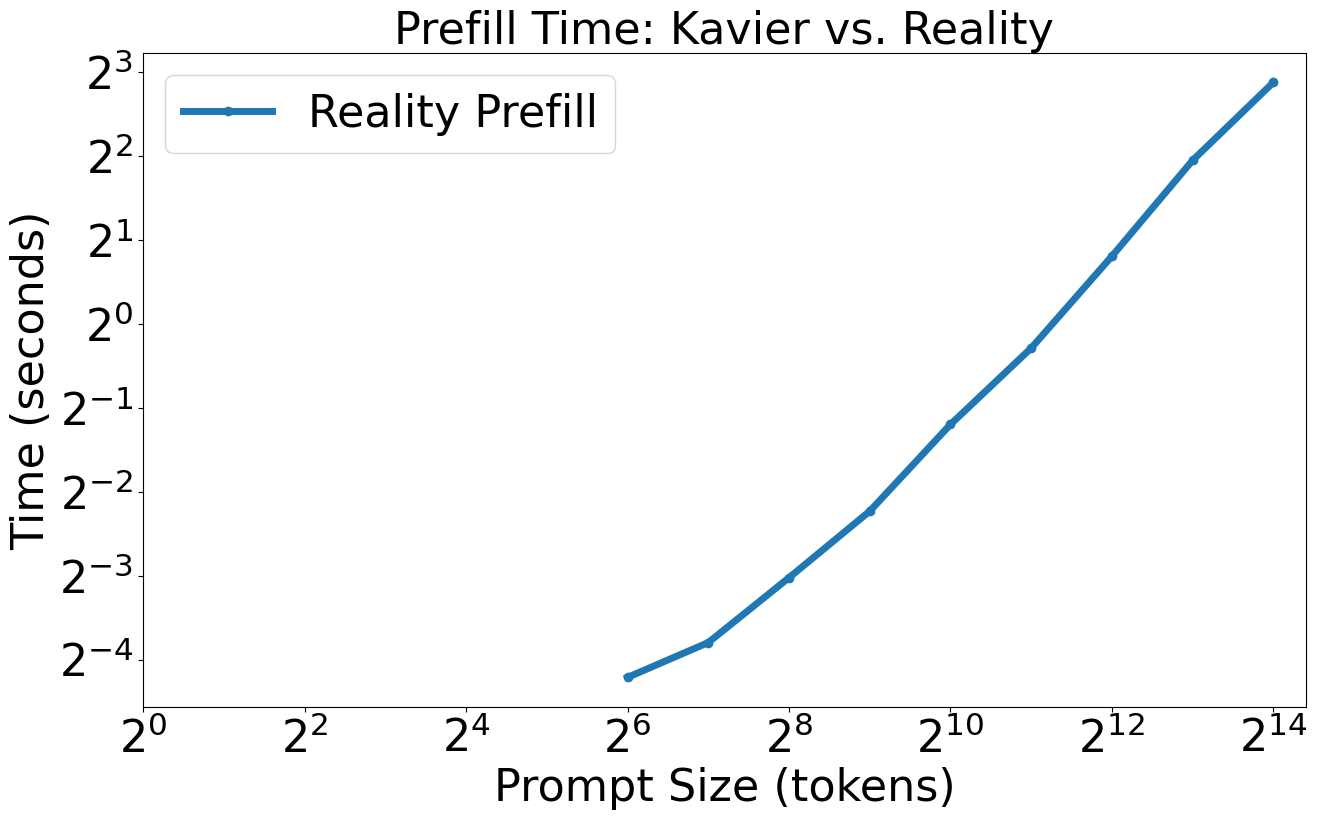

In [7]:
plt.figure(figsize=(15, 8.5))
plt.plot(df['prompt_size'], df['reality_prefill'], marker='o', linestyle='-', label='Reality Prefill')

plt.title('Prefill Time: Kavier vs. Reality', fontsize=32)
plt.xlabel('Prompt Size (tokens)', fontsize=32)
plt.ylabel('Time (seconds)', fontsize=32)
plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.gca().lines[0].set_linewidth(5)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.xlim(left=1)
plt.ylim(bottom=0)

plt.legend(fontsize=32)
plt.savefig("figures/prefill_reality.pdf")
plt.show()

/var/folders/zp/wbw59jc53p912jytp6zlm1wr0000gs/T/ipykernel_3638/2503274148.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


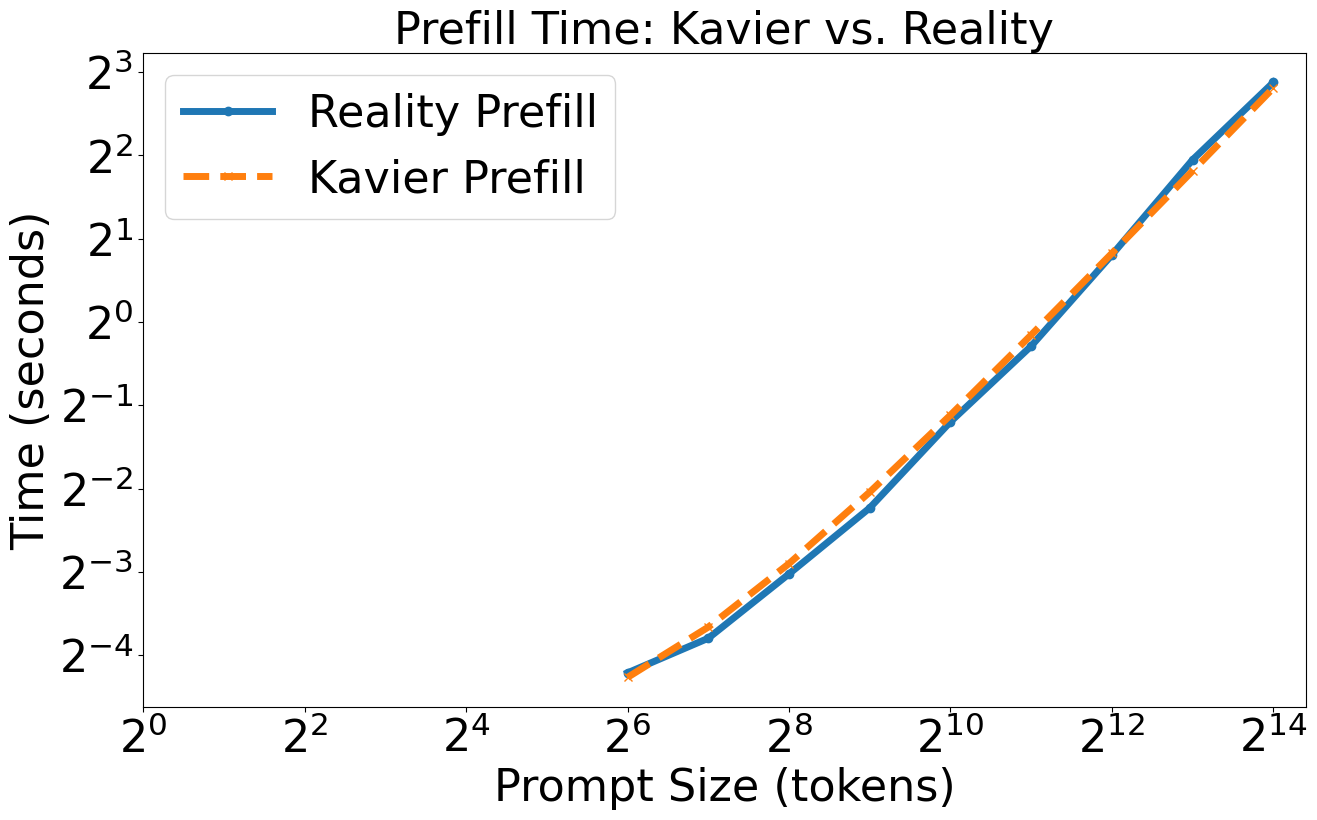

In [8]:
plt.figure(figsize=(15, 8.5))
plt.plot(df['prompt_size'], df['reality_prefill'], marker='o', linestyle='-', label='Reality Prefill')
plt.plot(df['prompt_size'], df['kavier_prefill'], marker='x', linestyle='--', label='Kavier Prefill')

plt.title('Prefill Time: Kavier vs. Reality', fontsize=32)
plt.xlabel('Prompt Size (tokens)', fontsize=32)
plt.ylabel('Time (seconds)', fontsize=32)
plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.gca().lines[0].set_linewidth(5)
plt.gca().lines[1].set_linewidth(5)

plt.xlim(left=1)
plt.ylim(bottom=0)

plt.legend(fontsize=32)
plt.savefig("figures/prefill_reality_kavier.pdf")
plt.show()

/var/folders/zp/wbw59jc53p912jytp6zlm1wr0000gs/T/ipykernel_3638/3215431597.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left=0)


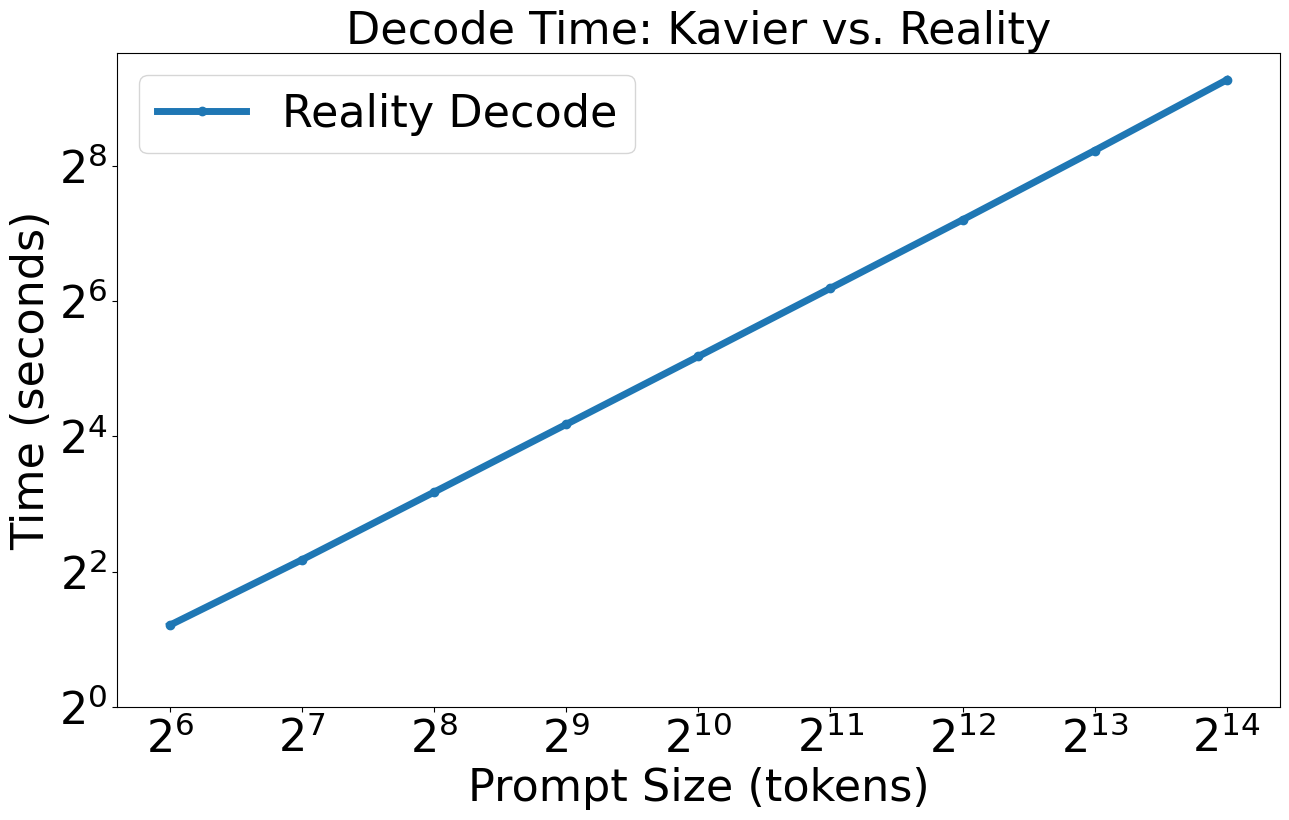

In [9]:
plt.figure(figsize=(15, 8.5))
plt.plot(df['prompt_size'], df['reality_decode'], marker='o', linestyle='-', label='Reality Decode')

plt.title('Decode Time: Kavier vs. Reality', fontsize=32)
plt.xlabel('Prompt Size (tokens)', fontsize=32)
plt.ylabel('Time (seconds)', fontsize=32)
plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.xlim(left=0)
plt.ylim(bottom=1)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.gca().lines[0].set_linewidth(5)

plt.legend(fontsize=32)
plt.savefig("figures/decode_reality.pdf")
plt.show()

/var/folders/zp/wbw59jc53p912jytp6zlm1wr0000gs/T/ipykernel_3638/964720782.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left=0)


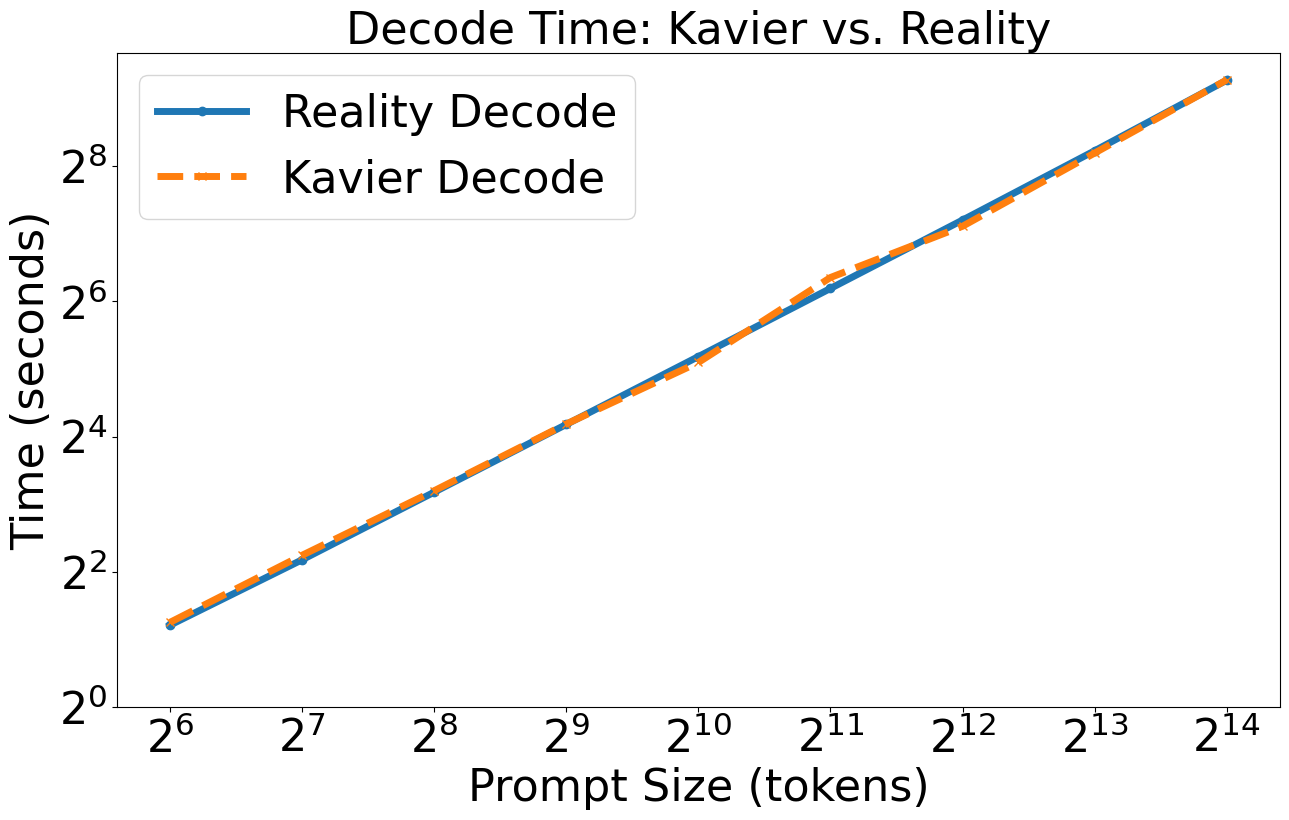

In [10]:
plt.figure(figsize=(15, 8.5))
plt.plot(df['prompt_size'], df['reality_decode'], marker='o', linestyle='-', label='Reality Decode')
plt.plot(df['prompt_size'], df['kavier_decode'], marker='x', linestyle='--', label='Kavier Decode')

plt.title('Decode Time: Kavier vs. Reality', fontsize=32)
plt.xlabel('Prompt Size (tokens)', fontsize=32)
plt.ylabel('Time (seconds)', fontsize=32)
plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.xlim(left=0)
plt.ylim(bottom=1)

plt.gca().lines[0].set_linewidth(5)
plt.gca().lines[1].set_linewidth(5)

plt.legend(fontsize=32)
plt.savefig("figures/decode_reality_kavier.pdf")
plt.show()